# Exploring the Relationship Between Gender and Wages

This project examined the relationship between average salary and various factors, including age, gender, years of experience, and education level in the United States, using data from a Kaggle dataset. The analysis involved data cleaning, descriptive statistics, and creating visualizations with Python and Pandas. Hypothesis testing was performed to assess salary differences between genders, and regression analysis was used to explore the correlation between experience and earnings. The study highlights skills in data analysis, statistical inference, and programming. The full report with detailed methodologies and findings is provided below.

## Final Report

In [1]:
from IPython.display import IFrame
IFrame("../_static/Exploring the Relationship Between Gender and Wages.pdf", width=790, height=1000)

## Code

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import copy

In [3]:
data = pd.read_csv('SalaryData.csv')
data = data.dropna(inplace = False, axis = 0)
data

Age  Gender Education Level                      Job Title  \
0    32.0    Male      Bachelor's              Software Engineer   
1    28.0  Female        Master's                   Data Analyst   
2    45.0    Male             PhD                 Senior Manager   
3    36.0  Female      Bachelor's                Sales Associate   
4    52.0    Male        Master's                       Director   
..    ...     ...             ...                            ...   
370  35.0  Female      Bachelor's       Senior Marketing Analyst   
371  43.0    Male        Master's         Director of Operations   
372  29.0  Female      Bachelor's         Junior Project Manager   
373  34.0    Male      Bachelor's  Senior Operations Coordinator   
374  44.0  Female             PhD        Senior Business Analyst   

     Years of Experience    Salary  
0                    5.0   90000.0  
1                    3.0   65000.0  
2                   15.0  150000.0  
3                    7.0   60000.0  
4                   20.0  200000.0  
..                   ...       ...  
370                  8.0   85000.0  
371                 19.0  170000.0  
372                  2.0   40000.0  
373                  7.0   90000.0  
374                 15.0  150000.0  

[373 rows x 6 columns]

In [4]:
data.drop('Job Title', axis=1, inplace=True)
data['Age'] = data['Age'].astype('int')
df = copy.deepcopy(data)
data.loc[data['Gender']=='Female', 'Gender'] = 0
data.loc[data['Gender']=='Male', 'Gender'] = 1
data.loc[data['Education Level']=="Bachelor's", 'Education Level'] = 1
data.loc[data['Education Level']=="Master's", 'Education Level'] = 2
data.loc[data['Education Level']=="PhD", 'Education Level'] = 3
data

Age Gender Education Level  Years of Experience    Salary
0     32      1               1                  5.0   90000.0
1     28      0               2                  3.0   65000.0
2     45      1               3                 15.0  150000.0
3     36      0               1                  7.0   60000.0
4     52      1               2                 20.0  200000.0
..   ...    ...             ...                  ...       ...
370   35      0               1                  8.0   85000.0
371   43      1               2                 19.0  170000.0
372   29      0               1                  2.0   40000.0
373   34      1               1                  7.0   90000.0
374   44      0               3                 15.0  150000.0

[373 rows x 5 columns]

In [5]:
df

Age  Gender Education Level  Years of Experience    Salary
0     32    Male      Bachelor's                  5.0   90000.0
1     28  Female        Master's                  3.0   65000.0
2     45    Male             PhD                 15.0  150000.0
3     36  Female      Bachelor's                  7.0   60000.0
4     52    Male        Master's                 20.0  200000.0
..   ...     ...             ...                  ...       ...
370   35  Female      Bachelor's                  8.0   85000.0
371   43    Male        Master's                 19.0  170000.0
372   29  Female      Bachelor's                  2.0   40000.0
373   34    Male      Bachelor's                  7.0   90000.0
374   44  Female             PhD                 15.0  150000.0

[373 rows x 5 columns]

In [6]:
age = data.groupby('Gender')['Age'].describe()
age

count       mean       std   min   25%   50%   75%   max
Gender                                                          
0       179.0  37.581006  6.992603  23.0  31.0  38.0  42.5  52.0
1       194.0  37.293814  7.154205  24.0  32.0  36.0  44.0  53.0

In [7]:
exp = data.groupby('Gender')['Years of Experience'].describe()
exp

count       mean       std  min  25%   50%   75%   max
Gender                                                        
0       179.0  10.011173  6.341843  0.0  4.0  10.0  15.0  25.0
1       194.0  10.048969  6.765803  0.0  4.0   8.5  16.0  25.0

In [8]:
salary = data.groupby('Gender')['Salary'].describe()
salary

count           mean           std      min      25%      50%  \
Gender                                                                  
0       179.0   97011.173184  45916.141054  35000.0  50000.0  90000.0   
1       194.0  103867.783505  50182.461438    350.0  60000.0  97500.0   

             75%       max  
Gender                      
0       140000.0  190000.0  
1       140000.0  250000.0

In [9]:
with pd.ExcelWriter('clean.xlsx') as writer:  
    data.to_excel(writer, sheet_name = "Data Set")
    age.to_excel(writer, sheet_name = "Age Stats")
    exp.to_excel(writer, sheet_name = "Experience (yrs) Stats")
    salary.to_excel(writer, sheet_name = "Salary Stats")

# data.to_csv('clean_df.csv')
# print("done")

In [10]:
fig = px.histogram(df, x = 'Age', y = 'Years of Experience', color = 'Gender' , title = 'Years of Experience by Age', width = 800)
fig.show()

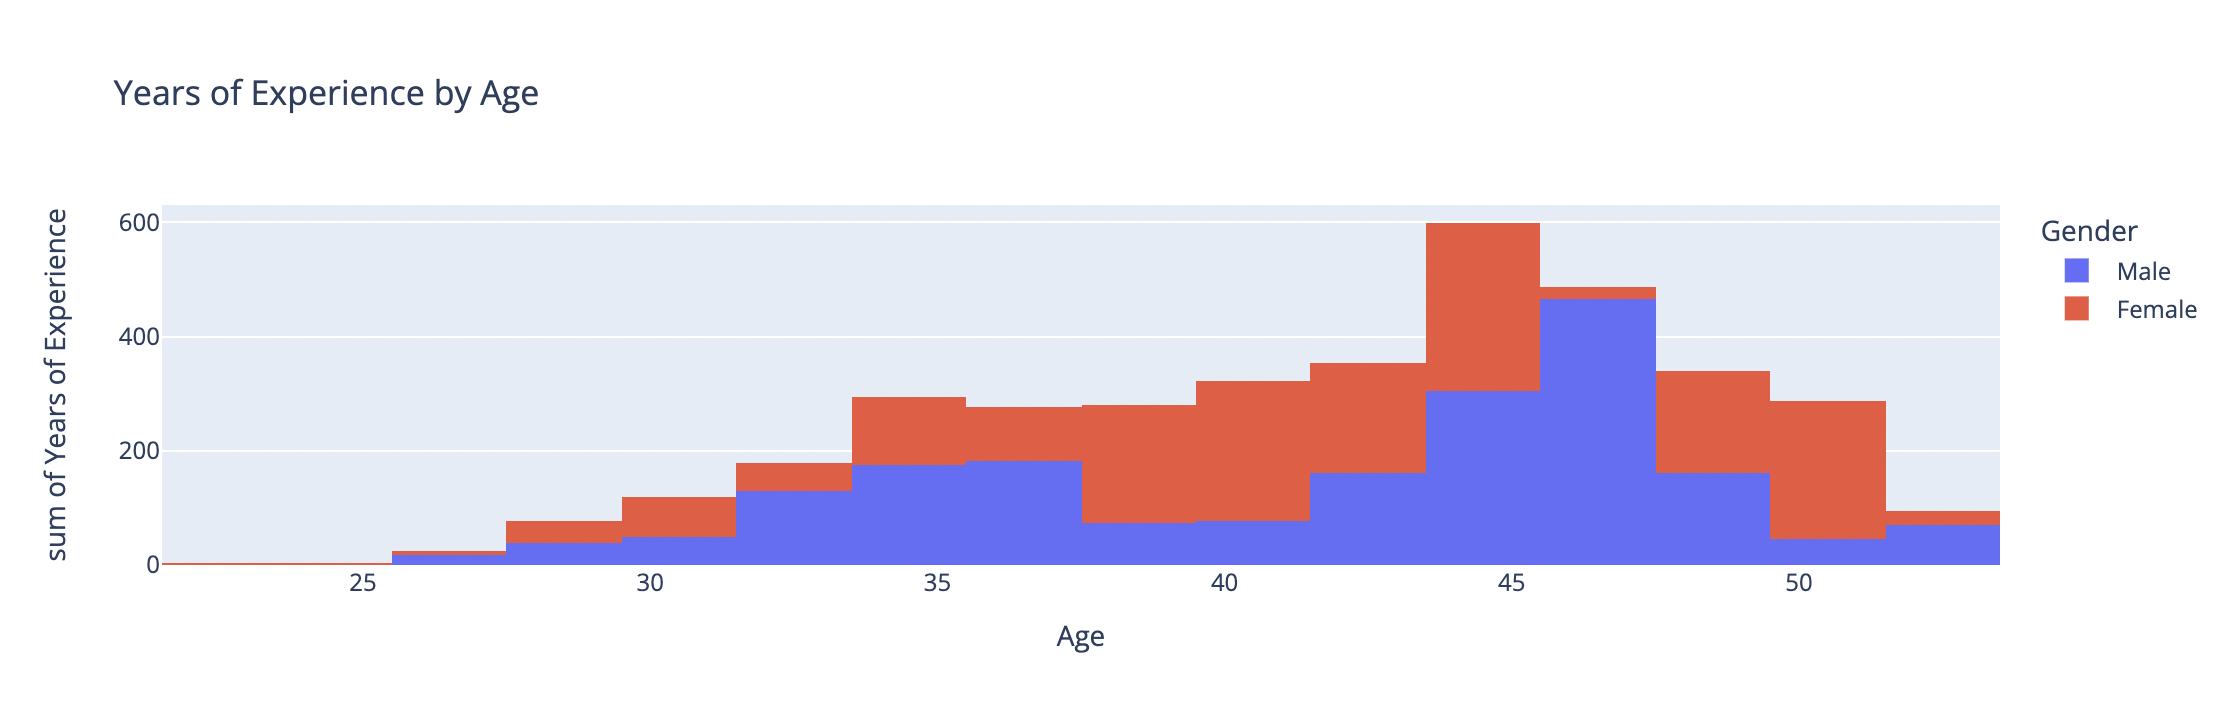

In [11]:
from IPython.display import Image
Image('3030-1.png')

In [12]:
fig = px.box(df, x = 'Gender', y = 'Salary', title="Salary Distribution by Gender", width = 800)
fig.show()

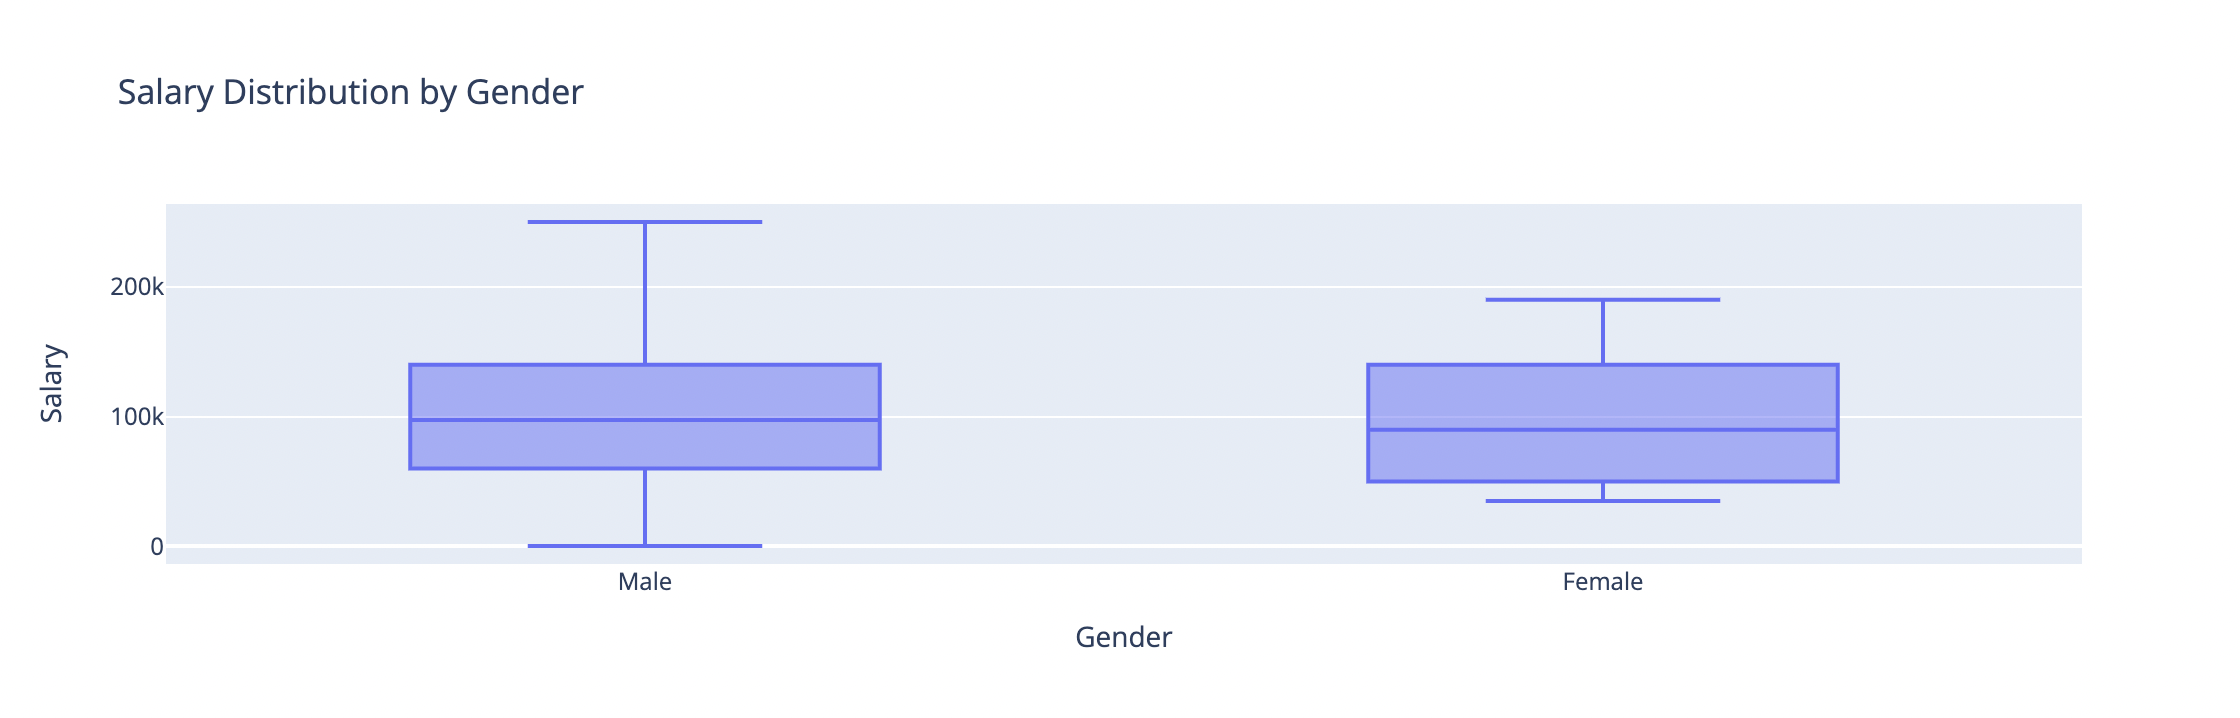

In [13]:
Image('3030-2.png')

In [14]:
fig = px.box(df, x = 'Education Level', y = 'Salary', title="Salary Distribution by Education Level", width = 800)
fig.show()

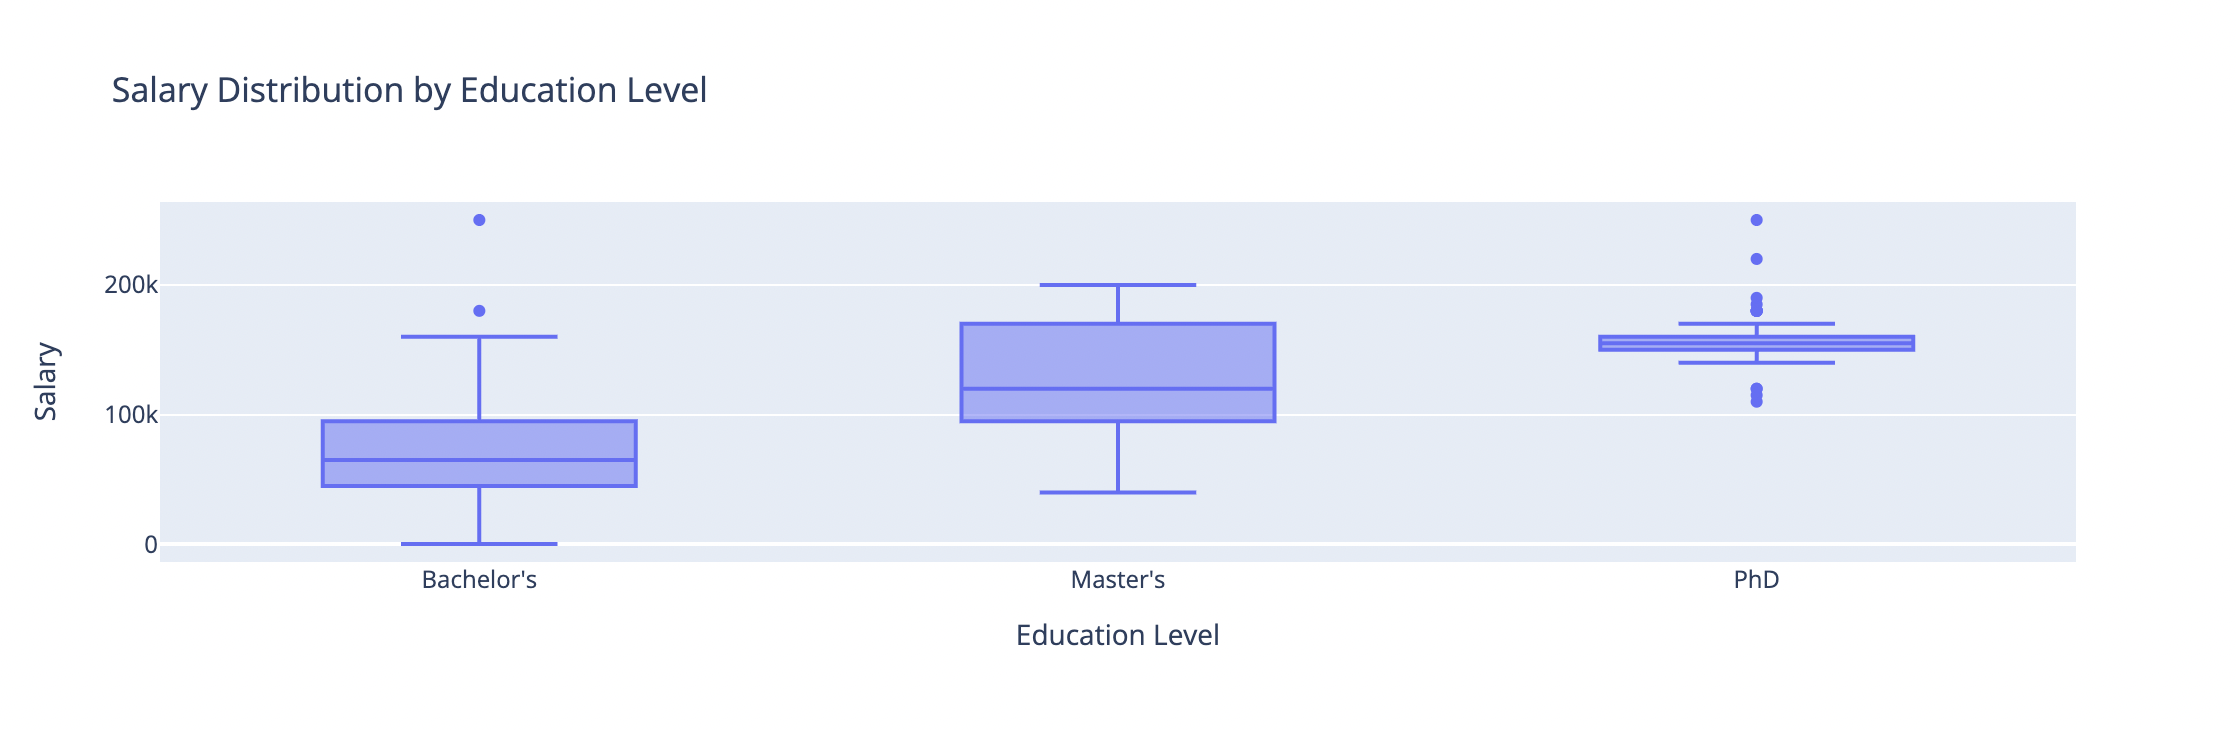

In [15]:
Image('3030-3.png')